In [ ]:
!pip install wordcloud

In [35]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install nltk
import nltk
from nltk import FreqDist
nltk.download('stopwords')
##from nltk.corpus import stopwords
#print(stopwords.words('english'))
import matplotlib.pyplot as plt

import collections
%matplotlib inline

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df = pd.read_csv("NLP_train_data.csv") # index_col=0, , index=False
df_exp = pd.read_csv("explicit.csv")
df_inexp = pd.read_csv("inexplicit.csv")

In [48]:
df_exp

Unnamed: 0          artist  \
0          27522     Chris Brown   
1          11568       Lil Wayne   
2          43066  Marilyn Manson   
3          36420        Ice Cube   
4          24237   Ariana Grande   
...          ...             ...   
1024       34751       Green Day   
1025       43011  Marilyn Manson   
1026       16126         Pitbull   
1027       48685            P!nk   
1028        5752        Fabolous   

                                               song  \
0                                        D.G.I.F.U.   
1                                       High Beamin   
2                                Unkillable Monster   
3                                It's A Man's World   
4                                 Thinking Bout You   
...                                             ...   
1024                          Platypus (I Hate You)   
1025  May Cause Discoloration Of The Urine Or Feces   
1026                                         Mr 305   
1027                                      True Love   
1028                                     Makin Love   

                                                   text  explicit_label  
0     [Verse 1: Tyga]   Ya'll know me, the still sam...            True  
1     [B.G.]   Niggas be hating 'cause B.G. got it  ...            True  
2     How the fuck are we supposed to know   When I'...            True  
3     Women they're good for nothing no maybe one th...            True  
4     [Verse 1]   I've been thinking 'bout you   Yea...            True  
...                                                 ...             ...  
1024  You're rise and fall   Back up against the wal...            True  
1025  6:30 this morning.   I can't hear ya.   I woke...            True  
1026  To all the dj's out there I appreciate the lov...            True  
1027  [Verse 1]   Sometimes I hate every single stup...            True  
1028  Whoa   Whoa   Ay man some kids gonna be runnin...            True  

[1029 rows x 5 columns]

In [49]:
df_inexp

Unnamed: 0         artist                           song  \
0          38729    Josh Groban                        Weeping   
1          13475   Natalie Cole       I've Got Love On My Mind   
2           8418   Indigo Girls  Bury My Heart At Wounded Knee   
3          25786      Bob Dylan         Changing Of The Guards   
4          46630   Oingo Boingo                  Whole Day Off   
...          ...            ...                            ...   
3034       37885  Jimmy Buffett                 Domino College   
3035       56906         Xscape                  Am I Dreamin'   
3036       30104       Don Moen                 Thank You Lord   
3037       41927      LL Cool J            Hollis To Hollywood   
3038       30737     Ed Sheeran                    Alfire Love   

                                                   text  explicit_label  
0     (Feat. Ladysmith Black Mambazo)      I knew a ...           False  
1     I've got love on my mind   I've got love on my...           False  
2     Indian legislation's on the desk of a do right...           False  
3     Sixteen years,   Sixteen banners united over t...           False  
4     Have you seen my girlfriend   She lives in a p...           False  
...                                                 ...             ...  
3034  Found myself a matchbook   Beside some hotel b...           False  
3035  Am I dreaming, baby,   Are you for real?      ...           False  
3036  Bible says it's a good thing to give thanks to...           False  
3037  "All that is gold does not glitter, not all th...           False  
3038  Things were all good yesterday   And then the ...           False  

[3039 rows x 5 columns]

In [50]:
exp = df_exp.text.tolist()
inexp = df_inexp.text.tolist()

In [51]:
exp

["[Verse 1: Tyga]   Ya'll know me, the still same OG, young T-Y-G   Hated on by most these niggas   But I still keep shittin' on niggas lowkey   I don't fuck with you to the third degree   I keep a G, DMV, you owe a three   Schemin' on the low, tryna make a nigga profitly   All I do is get money, fuck, and sleep   I should run for mayor   Been runnin' shit, you barely maintainin', bitch   No, this ain't no (?) shit   Break a neck on some Busta shit   (?) shit   I be on til infinity   Don't predict, bitch, what I'm gonna do   Cause chances are I've outdone you   And most of my so called enemies   Spit your game, talk your shit   Grab your gat, call your clique   Ball so hard I don't need the assist   I'm the best so I keep that shit   Nigga, you should too   If you knew what this game'll do to you   Look at bullshit that I've been through   This the drive through and shit on you      [Hook: Tyga]   Don't get it fucked up   Yesterday was the freshest nigga in America   I swear to God I a

In [52]:
inexp

['(Feat. Ladysmith Black Mambazo)      I knew a man who lived in fear   It was huge, it was angry,   It was drawing near.   Behind his house a secret place   Was the shadow of the demon   He could never face.      He built a wall of steel and flame   And men with guns to keep it tame   Then standing back he made it plain   That the nightmare would never ever rise again   But the fear and the fire and the guns remain.      It doesn\'t matter now it\'s over anyhow   He tells the world that it\'s sleeping   But as the night came round I heard   It\'s lonely sound   It wasn\'t roaring, it was weeping   It wasn\'t roaring, it was weeping.      And then one day the neighbors came   They were curious to know about the smoke and flame   They stood around outside the wall   But of course there was nothing to be heard at all   "My friends," he said, "We\'ve reached our goal   The threat is under firm control   As long as peace and order reign   I\'ll be damned if I can see a reason to explain   

In [78]:
#explicit

In [79]:
text = " ".join(abstr for abstr in exp).lower()
text

'[verse 1: tyga]   ya\'ll know me, the still same og, young t-y-g   hated on by most these niggas   but i still keep shittin\' on niggas lowkey   i don\'t fuck with you to the third degree   i keep a g, dmv, you owe a three   schemin\' on the low, tryna make a nigga profitly   all i do is get money, fuck, and sleep   i should run for mayor   been runnin\' shit, you barely maintainin\', bitch   no, this ain\'t no (?) shit   break a neck on some busta shit   (?) shit   i be on til infinity   don\'t predict, bitch, what i\'m gonna do   cause chances are i\'ve outdone you   and most of my so called enemies   spit your game, talk your shit   grab your gat, call your clique   ball so hard i don\'t need the assist   i\'m the best so i keep that shit   nigga, you should too   if you knew what this game\'ll do to you   look at bullshit that i\'ve been through   this the drive through and shit on you      [hook: tyga]   don\'t get it fucked up   yesterday was the freshest nigga in america   i sw

In [ ]:
import random
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h  = random.randint(5,60) # choose h in color picker 
        s = int(100.0 * 255.0 / 255.0)
        l = int(100.0 * float(random.randint(60, 120)) / 255.0)
        return "hsl({}, {}%, {}%)".format(h, s, l)

In [138]:
stopwords = nltk.corpus.stopwords.words('english') 
newStopWords = ['got','I','time','say','life','get','cause','yeah','got','like','know','way','keep','make',
                'better','one','i\'m','see','want','girl','car','gone','let','feel','let','take','come','that',
                'ya','man','go','right','head','call','eye','tell','look','boy','gotta','oh\ oh','back','think',
                'that','i\'ll','put','told','em','said','day','that','still','two','even','well','world','need',
                'that','hear','could','give','hand','stay','around','face','would','every','thing','show','hold',
                'people','looking','good','ain\'t','us','real','wanna','gonna','what','i\'ve','chorus','baby',
                'love','first','really','big','made','everything','verse','thing','home','find','much','that',
                'try','another','long','mind','live','tha','heart'] 
stopwords.extend(newStopWords)

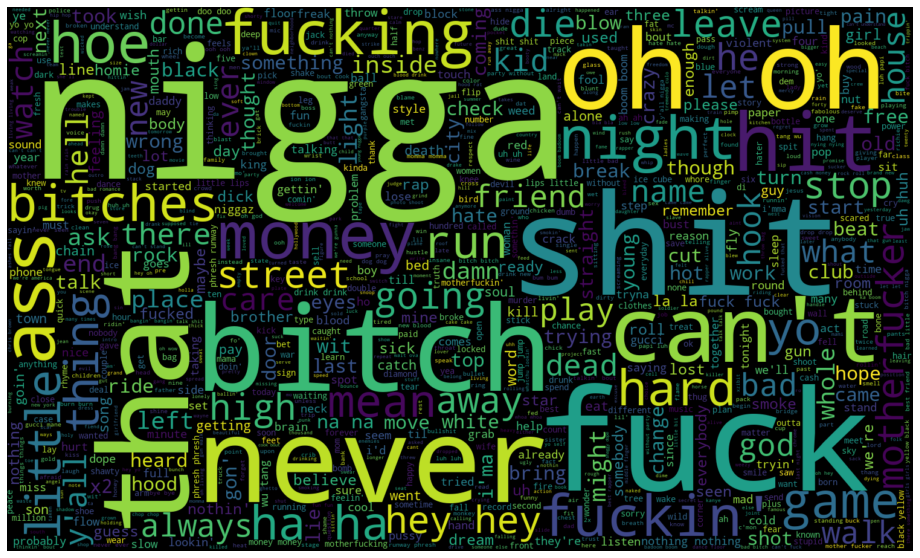

<Figure size 1080x720 with 0 Axes>

In [140]:

mask = np.array(Image.open("pic7.jpg"))
wc = WordCloud(background_color="black", max_words=1000, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick',
               max_font_size=300).generate(text)
    #min_font_size=15,
    #max_font_size=50, 
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,10))
plt.show()

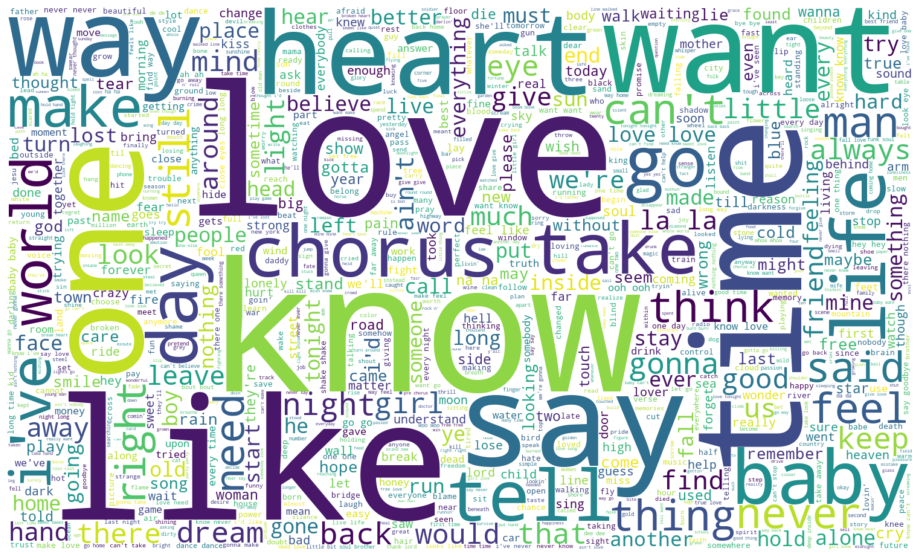

<Figure size 1080x720 with 0 Axes>

In [146]:
text2 = " ".join(abstr for abstr in inexp).lower()

stopwords = nltk.corpus.stopwords.words('english') 
newStopWords = ['oh','see','yeah','ya','let','get','well','cause','could','i\'ll','i\'m','got','come','that'] 
stopwords.extend(newStopWords)

mask = np.array(Image.open("pic7.jpg"))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick',
               max_font_size=300).generate(text2)
    #min_font_size=15,
    #max_font_size=50, 
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(15,10))
plt.show()